#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### Load the datasets

In [2]:
train = pd.read_csv(r'Train.csv')
train.head(10)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
5,tour_1005,UNITED KINGDOM,25-44,NaN,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,No,9.0,3.0,Cash,Yes,Wildlife,120950.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,10.0,3.0,Cash,Yes,Friendly People,3480750.0
8,tour_101,NIGERIA,25-44,Alone,0.0,1.0,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,4.0,0.0,Cash,Yes,NaN,994500.0
9,tour_1011,INDIA,25-44,Alone,1.0,0.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,Yes,Friendly People,2486250.0


In [52]:
test = pd.read_csv(r'Test.csv')
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

#### Descriptive statistics

In [5]:
pd.options.display.float_format='{:.1f}'.format
stats = train.describe(include='float64').T
stats

,count,mean,std,min,25%,50%,75%,max
total_female,4806.0,0.9,1.3,0.0,0.0,1.0,1.0,49.0
total_male,4804.0,1.0,1.1,0.0,1.0,1.0,1.0,44.0
night_mainland,4809.0,8.5,10.4,0.0,3.0,6.0,11.0,145.0
night_zanzibar,4809.0,2.3,4.2,0.0,0.0,0.0,4.0,61.0
total_cost,4809.0,8114388.8,12224903.3,49000.0,812175.0,3397875.0,9945000.0,99532875.0


In [6]:
stacs = train.describe(include='object').T
stacs

,count,unique,top,freq
ID,4809,4809,tour_999,1
country,4809,105,UNITED STATES OF AMERICA,695
age_group,4809,4,25-44,2487
travel_with,3695,5,Alone,1265
purpose,4809,7,Leisure and Holidays,2840
main_activity,4809,9,Wildlife tourism,2259
info_source,4809,8,"Travel, agent, tour operator",1913
tour_arrangement,4809,2,Independent,2570
package_transport_int,4809,2,No,3357
package_accomodation,4809,2,No,2602


In [13]:
pd.DataFrame(train['age_group'].value_counts())

,count
age_group,
25-44,2487
45-64,1391
1-24,624
65+,307


In [14]:
pd.DataFrame(train['most_impressing'].value_counts())

,count
most_impressing,
Friendly People,1541
Wildlife,1038
No comments,743
"Wonderful Country, Landscape, Nature",507
Good service,365
Excellent Experience,271
Satisfies and Hope Come Back,31


In [15]:
pd.DataFrame(train['travel_with'].value_counts())

,count
travel_with,
Alone,1265
Spouse,1005
Friends/Relatives,895
Spouse and Children,368
Children,162


#### Data cleaning and Preprocessing

#### Columns 'travel_with', 'most impressing', 'total female' and 'total male' have missing values

In [7]:
train['travel_with'] = train['travel_with'].fillna(train['travel_with'].mode()[0])

In [8]:
train['most_impressing'] = train['most_impressing'].fillna(train['most_impressing'].mode()[0])

In [9]:
train['total_female'] = train['total_female'].fillna(train['total_female'].mode()[0])

In [10]:
train['total_male'] = train['total_male'].fillna(train['total_male'].mode()[0])

#### Check for duplicates

In [11]:
train.duplicated().sum()

np.int64(0)

In [12]:
test.duplicated().sum()

np.int64(0)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

#### Create new features

In [14]:
train['total_tourists'] = train['total_female'] + train['total_male']
train['total_nights'] = train['night_mainland'] + train['night_zanzibar']

The total number of tourists represents both male and female tourists who visisted Tanzania while total number of nights represent nights spent both in Zanzibar and mainland by tourists. This reduces the number of variables to be considered.

This improves model prediction by only considering important variables

#### Exploratory Data analysis

In [15]:
train_data = train.drop(columns=['ID', 'country','total_male','total_female','night_mainland','night_zanzibar','info_source'], axis=1)
train_data.columns

Index(['age_group', 'travel_with', 'purpose', 'main_activity',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'total_cost', 'total_tourists',
       'total_nights'],
      dtype='object')

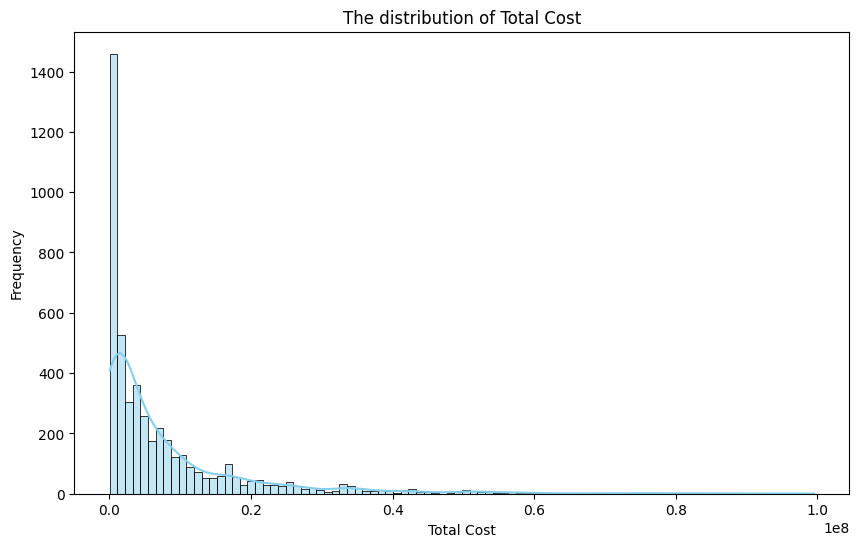

In [16]:
# Distribution of total cost - the target colum
plt.figure(figsize=(10,6))
sns.histplot(x=train_data['total_cost'], kde=True, color='skyblue')
plt.title('The distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2169301418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='deep')


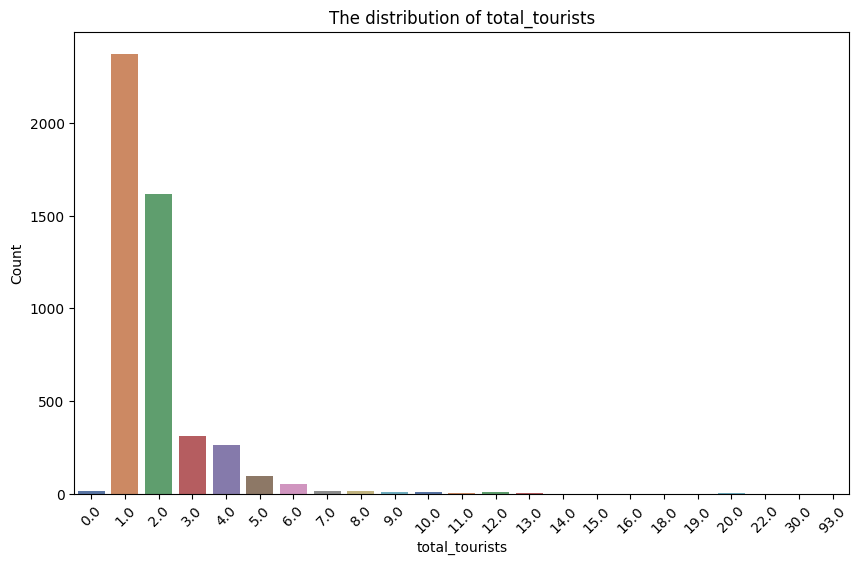

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2169301418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='deep')


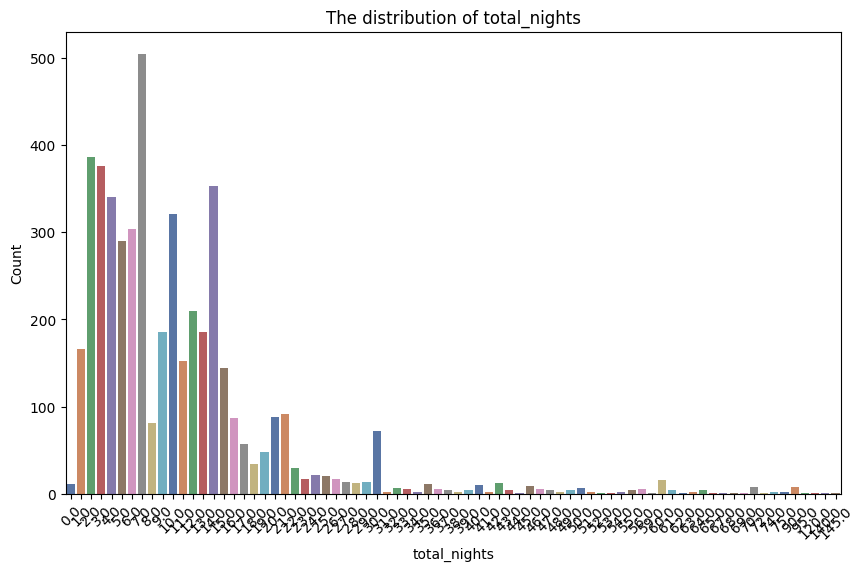

In [22]:
discrete_cols = train_data[['total_tourists', 'total_nights']]
for col in discrete_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=train_data, x=col, palette='deep')
    plt.title(f"The distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [19]:
categorical_columns = train_data.select_dtypes(include='object').columns
print(categorical_columns)

Index(['age_group', 'travel_with', 'purpose', 'main_activity',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'payment_mode',
       'first_trip_tz', 'most_impressing'],
      dtype='object')


C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


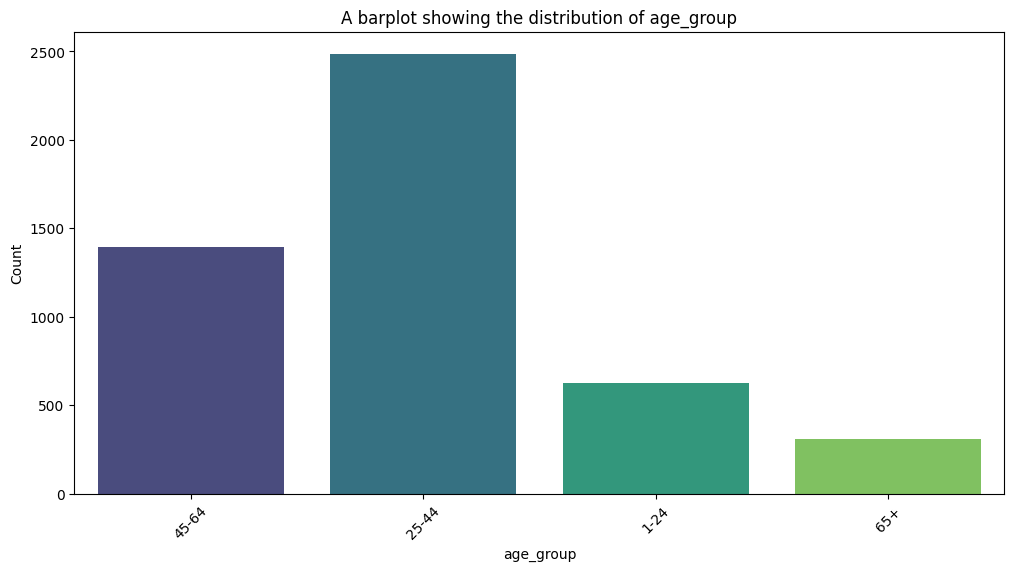

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


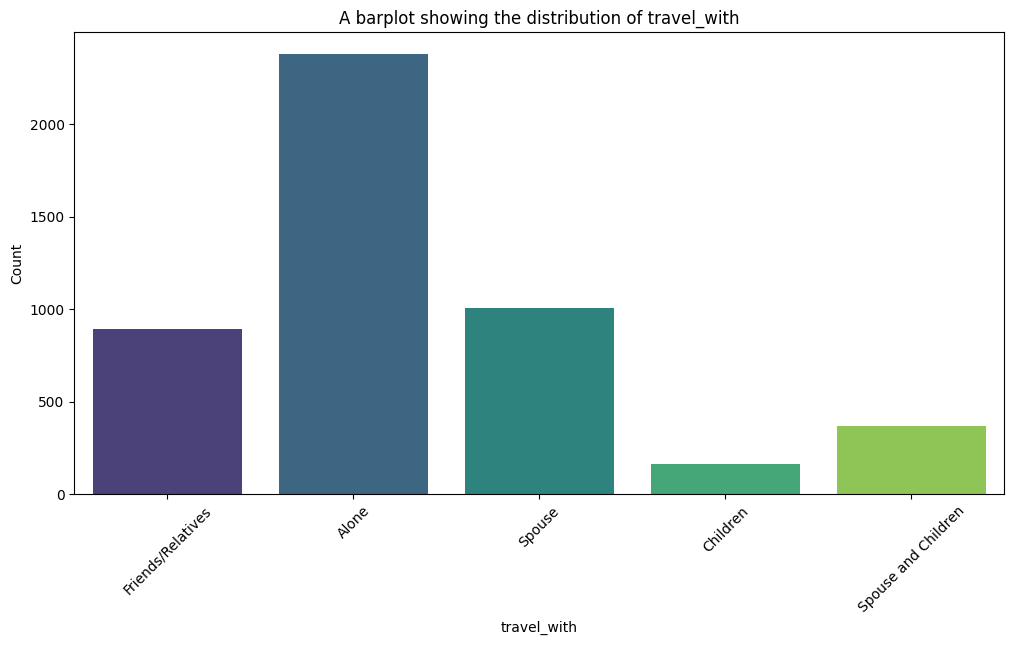

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


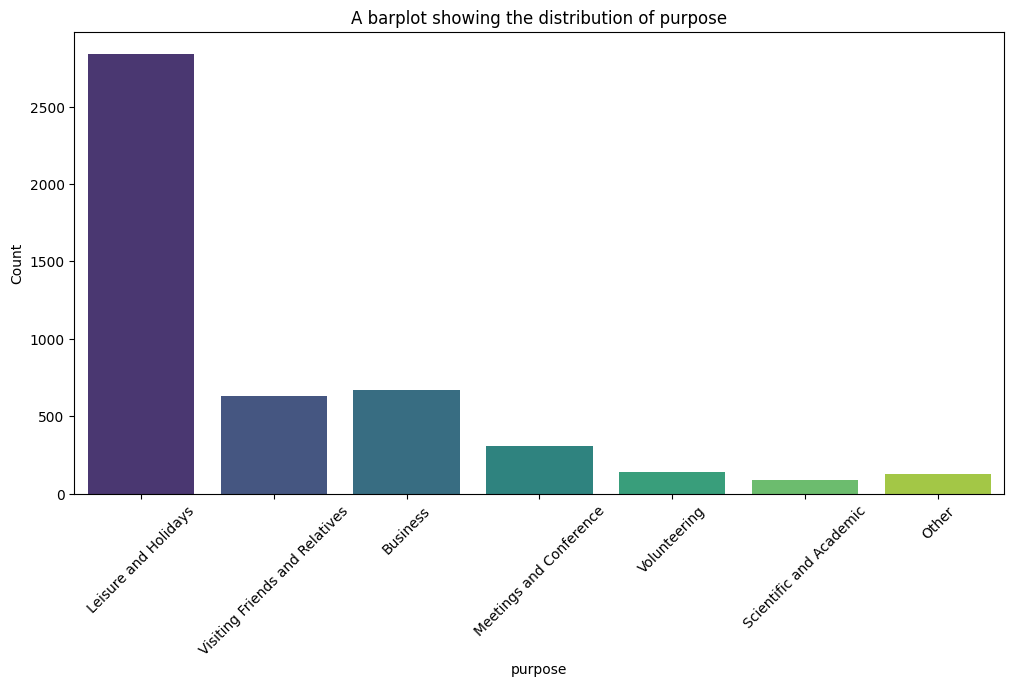

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


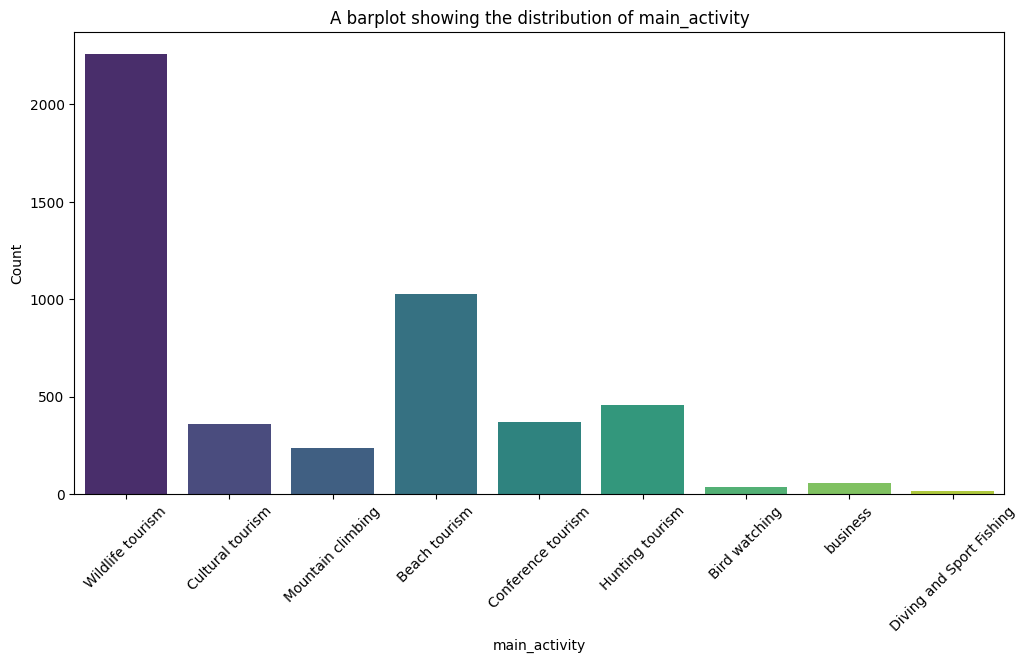

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


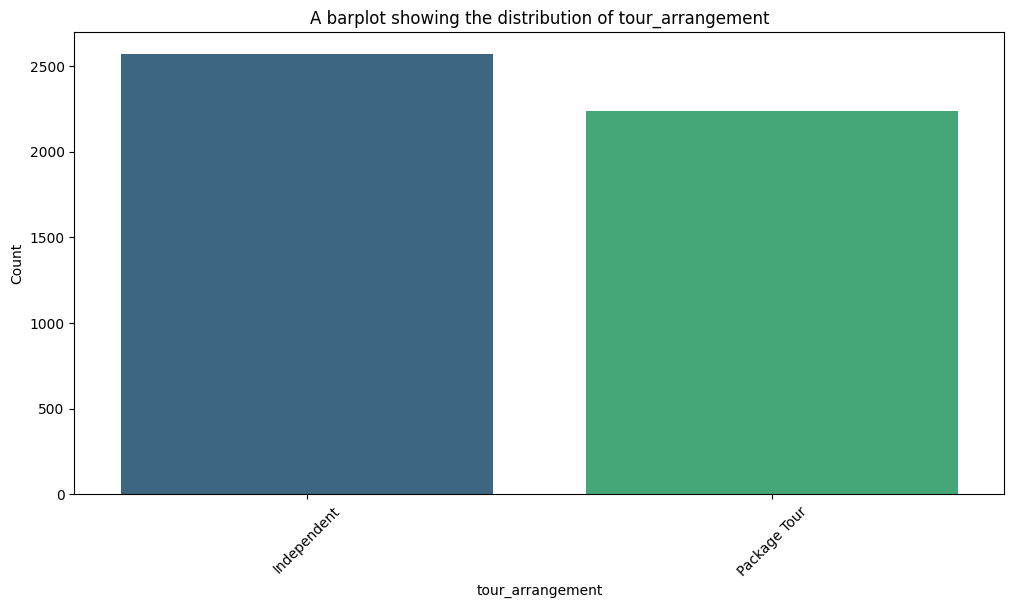

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


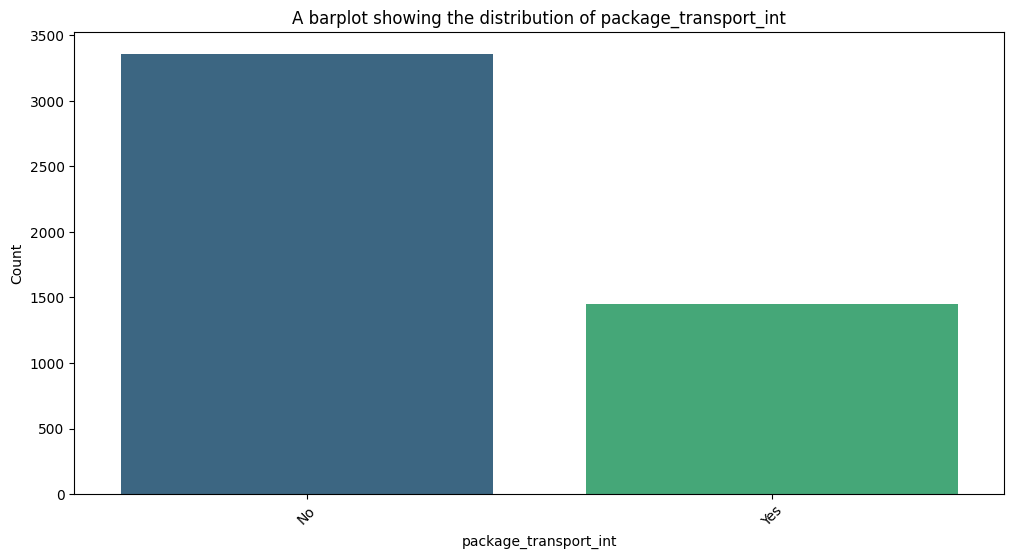

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


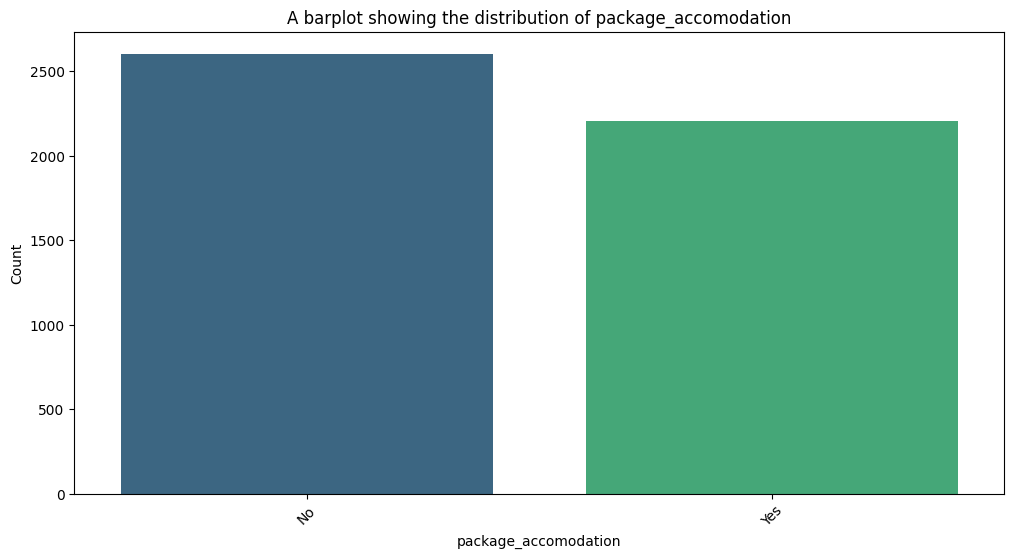

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


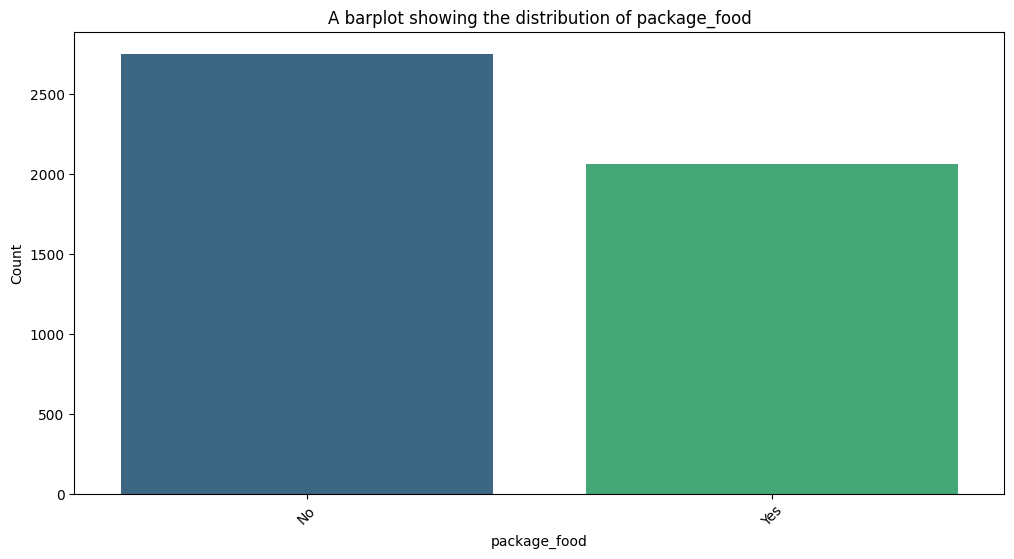

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


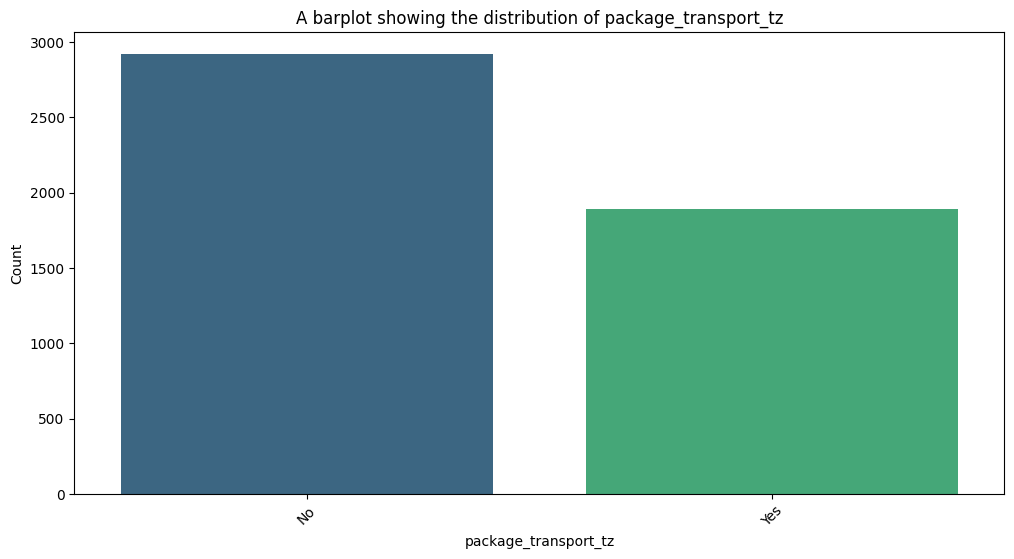

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


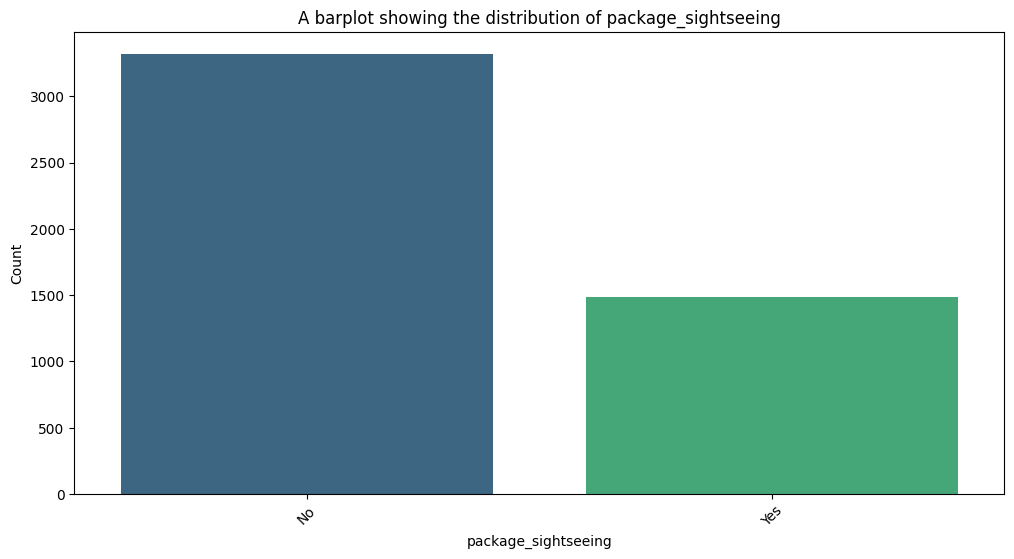

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


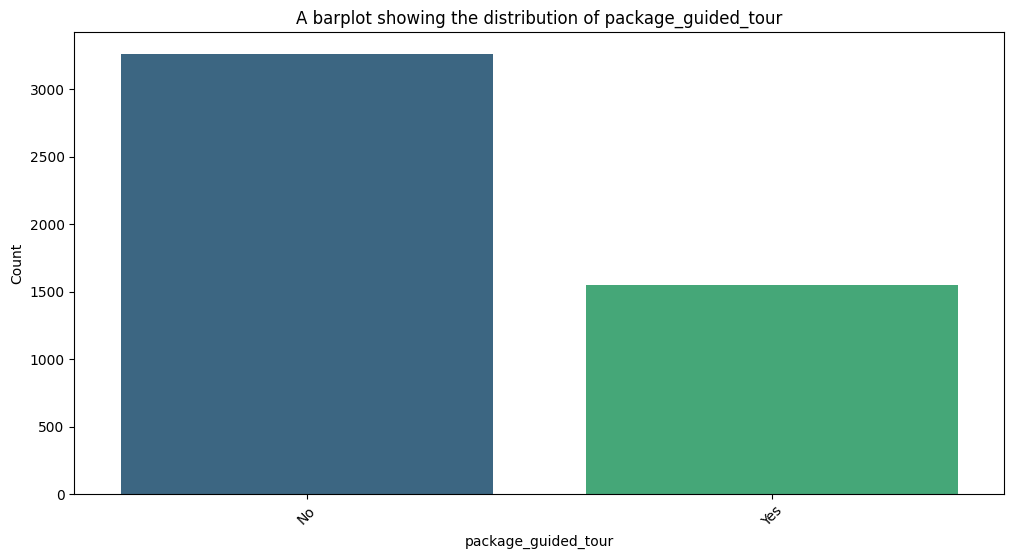

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


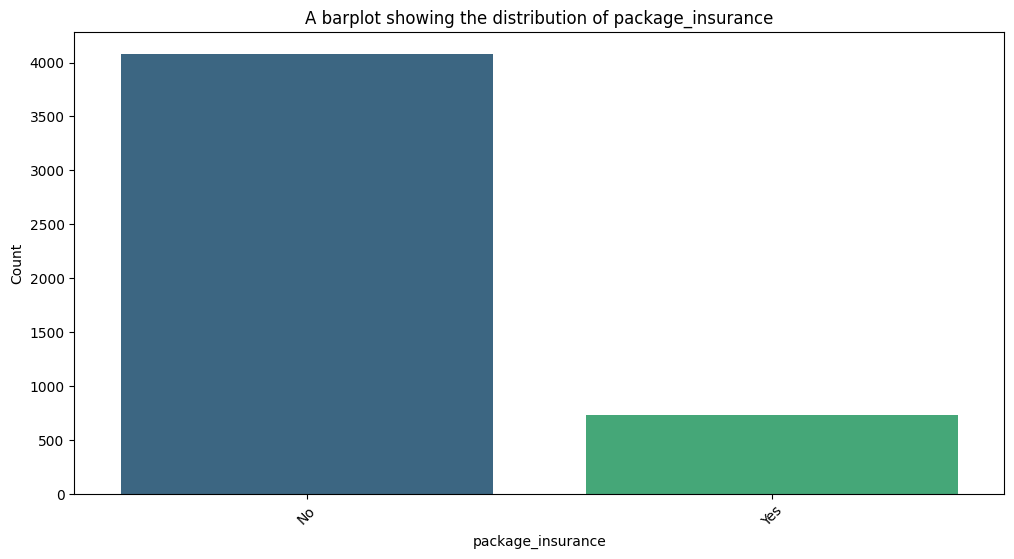

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


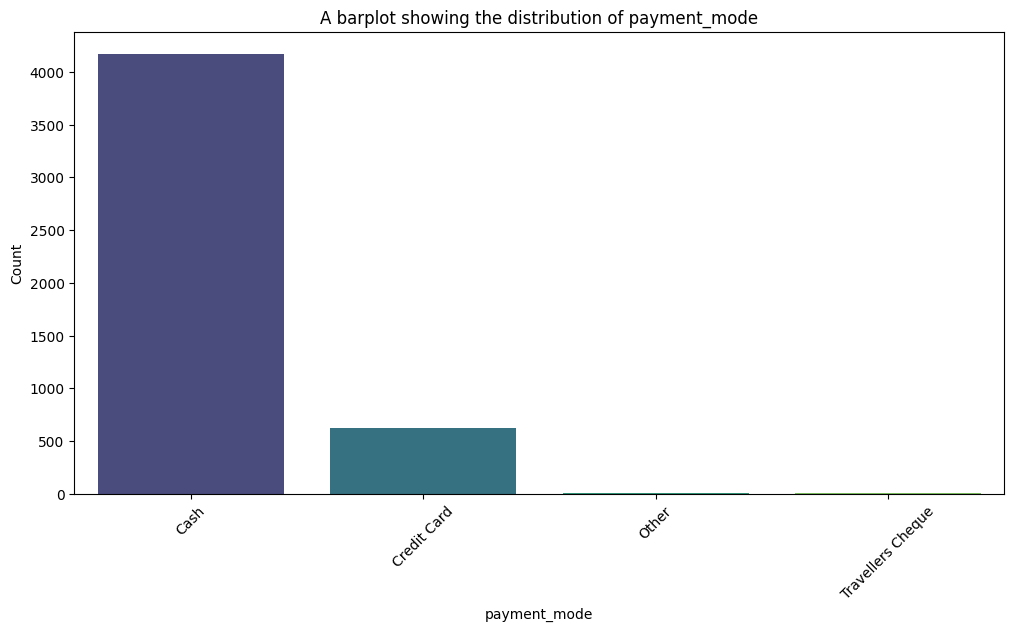

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


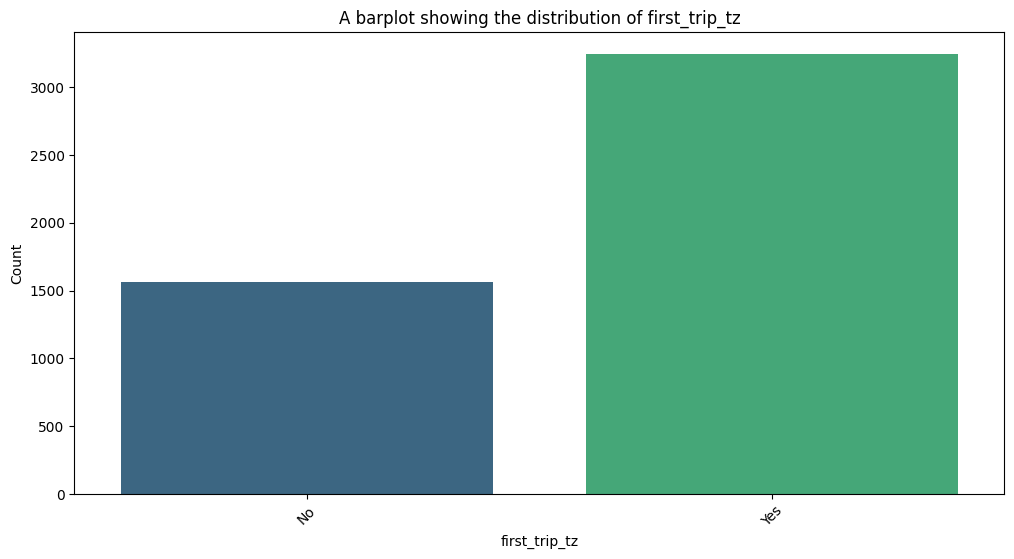

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\2430679269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis')


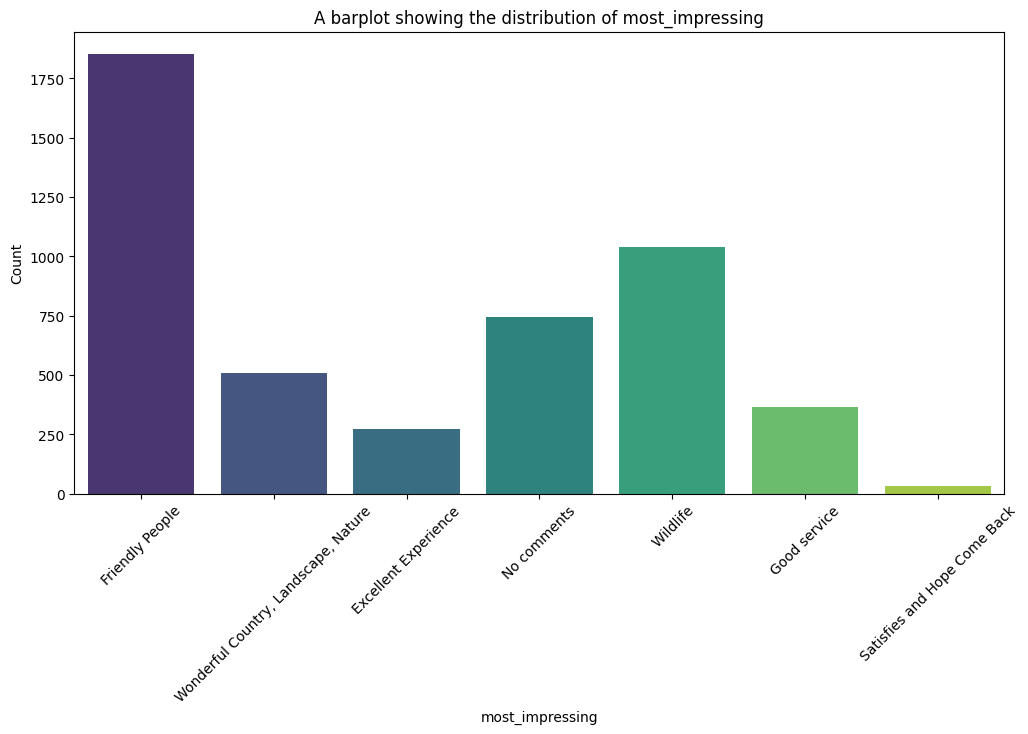

In [21]:
for col in categorical_columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=train_data, x=col, palette='viridis')
    plt.title(f"A barplot showing the distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

#### Encoding the categorical variables 

In [ ]:
df = train_data[['age_group', 'travel_with', 'purpose', 'main_activity',
       'payment_mode', 'most_impressing']]

In [26]:
ordinal_columns = train_data[['tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz','first_trip_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance']]

#### Label Encoding

In [29]:
le = LabelEncoder()

In [36]:
for col in ordinal_columns:
    train_data[col] = le.fit_transform(train_data[col])

In [37]:
train_data.head()

,age_group,travel_with,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode,first_trip_tz,most_impressing,total_cost,total_tourists,total_nights
0,45-64,Friends/Relatives,Leisure and Holidays,Wildlife tourism,0,0,0,0,0,0,0,0,Cash,0,Friendly People,674602.5,2.0,13.0
1,25-44,Alone,Leisure and Holidays,Cultural tourism,0,0,0,0,0,0,0,0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5,1.0,21.0
2,25-44,Alone,Visiting Friends and Relatives,Cultural tourism,0,0,0,0,0,0,0,0,Cash,0,Excellent Experience,3315000.0,1.0,32.0
3,25-44,Spouse,Leisure and Holidays,Wildlife tourism,1,0,1,1,1,1,1,0,Cash,1,Friendly People,7790250.0,2.0,11.0
4,1-24,Alone,Leisure and Holidays,Wildlife tourism,0,0,0,0,0,0,0,0,Cash,1,No comments,1657500.0,1.0,11.0


#### One-Hot encoding

In [38]:
df_encoded = pd.get_dummies(columns=df.columns, data=df, drop_first=True).astype(int)

In [39]:
train_data1 = pd.concat([train_data, df_encoded], axis=1)
train_data1.head()

,age_group,travel_with,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,main_activity_business,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,45-64,Friends/Relatives,Leisure and Holidays,Wildlife tourism,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,25-44,Alone,Leisure and Holidays,Cultural tourism,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25-44,Alone,Visiting Friends and Relatives,Cultural tourism,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,25-44,Spouse,Leisure and Holidays,Wildlife tourism,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4,1-24,Alone,Leisure and Holidays,Wildlife tourism,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
# Drop redundant columns
train_data1 = train_data1.drop(columns=['age_group', 'travel_with', 'purpose', 'main_activity',
       'payment_mode', 'most_impressing'], axis=1)

In [41]:
train_data1.head()

,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,first_trip_tz,total_cost,...,main_activity_business,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,0,0,0,0,0,0,0,0,0,674602.5,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,3214906.5,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,3315000.0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,1,1,1,1,0,1,7790250.0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1657500.0,...,0,0,0,0,0,0,0,1,0,0


#### Define the variables

In [42]:
X = train_data1.drop(columns='total_cost', axis=1)
y = train_data1['total_cost']

#### Fit the model

In [44]:
# Linear Model
linear_model = LinearRegression()
linear_model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Predict total cost using the test data

In [53]:
test['travel_with'] = test['travel_with'].fillna(test['travel_with'].mode()[0])
test['most_impressing'] = test['most_impressing'].fillna(test['most_impressing'].mode()[0])
test['total_female'] = test['total_female'].fillna(test['total_female'].mode()[0])
test['total_male'] = test['total_male'].fillna(test['total_male'].mode()[0])

In [54]:
test['total_tourists'] = test['total_female'] + test['total_male']
test['total_nights'] = test['night_mainland'] + test['night_zanzibar']

In [55]:
test_data = test.drop(columns=['ID', 'country','total_male','total_female','night_mainland','night_zanzibar','info_source'], axis=1)
test_data.columns

Index(['age_group', 'travel_with', 'purpose', 'main_activity',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'total_tourists', 'total_nights'],
      dtype='object')

In [56]:
df = test_data[['age_group', 'travel_with', 'purpose', 'main_activity',
       'payment_mode', 'most_impressing']]

ordinal_columns = test_data[['tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz','first_trip_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance']]

In [59]:
for col in ordinal_columns:
    test_data[col] = le.fit_transform(test_data[col])

In [60]:
test_data.head()

,age_group,travel_with,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode,first_trip_tz,most_impressing,total_tourists,total_nights
0,45-64,Spouse,Leisure and Holidays,Wildlife tourism,1,1,1,1,1,1,1,1,Cash,1,Wildlife,2.0,13
1,25-44,Friends/Relatives,Business,Wildlife tourism,1,1,1,0,0,0,0,0,Cash,0,"Wonderful Country, Landscape, Nature",4.0,13
2,25-44,Friends/Relatives,Leisure and Holidays,Beach tourism,0,0,0,0,0,0,0,0,Cash,0,No comments,3.0,21
3,24-Jan,Friends/Relatives,Leisure and Holidays,Cultural tourism,0,0,0,0,0,0,0,0,Cash,1,Friendly People,2.0,4
4,45-64,Friends/Relatives,Leisure and Holidays,Wildlife tourism,1,1,1,1,1,0,0,0,Cash,1,Friendly People,4.0,10


In [61]:
df_encoded = pd.get_dummies(columns=df.columns, data=df, drop_first=True).astype(int)

In [62]:
test_data1 = pd.concat([test_data, df_encoded], axis=1)
test_data1.head()

,age_group,travel_with,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,main_activity_business,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,45-64,Spouse,Leisure and Holidays,Wildlife tourism,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,25-44,Friends/Relatives,Business,Wildlife tourism,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25-44,Friends/Relatives,Leisure and Holidays,Beach tourism,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,24-Jan,Friends/Relatives,Leisure and Holidays,Cultural tourism,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,45-64,Friends/Relatives,Leisure and Holidays,Wildlife tourism,1,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
# Drop redundant columns
test_data1 = test_data1.drop(columns=['age_group', 'travel_with', 'purpose', 'main_activity',
       'payment_mode', 'most_impressing'], axis=1)
test_data1.head()

,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,first_trip_tz,total_tourists,...,main_activity_business,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1,1,1,1,1,1,1,1,1,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,4.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,3.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,2.0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,1,1,0,0,0,1,4.0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
test_data.total_cost = linear_model.predict(test_data1)

C:\Users\USER\AppData\Local\Temp\ipykernel_14260\706239925.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_data.total_cost = linear_model.predict(test_data1)


In [65]:
test_data.total_cost

array([18023308.94016509, 11727459.68593925,  5344484.19366254, ...,
       -1007820.21218497, -1714934.14535153,  3787591.29567354],
      shape=(1601,))

In [66]:
submission = pd.DataFrame({'ID': test['ID'],
                          'total_cost': test_data.total_cost})

In [67]:
# Python code to remove sientific notation of numbers
pd.options.display.float_format='{:.1f}'.format

In [68]:
# Sample the first 10 predictions
submission.sample(10)

,ID,total_cost
545,tour_2874,15987550.1
1163,tour_5254,13221563.7
265,tour_1924,14418833.7
98,tour_1307,2088794.7
1442,tour_6280,3611415.6
1160,tour_5240,1658205.0
1437,tour_6263,-92792.3
1498,tour_653,-620621.1
1059,tour_4873,13919571.4
973,tour_4474,6407046.9


In [69]:
# Export the predictions to csv file
submission.to_csv('Submission_File2.csv', index=False)

In [70]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
test_data.total_cost = rf_model.predict(test_data1)

In [73]:
submission1 = pd.DataFrame({'ID': test['ID'],
                            'total_cost': test_data.total_cost})

In [74]:
submission1.sample(5)

,ID,total_cost
348,tour_2215,8447636.4
235,tour_1815,4983053.9
1129,tour_515,2445823.9
30,tour_1105,7190529.0
1230,tour_5490,11817521.7


In [75]:
submission1.to_csv('Submission_File3.csv', index=False)